<a href="https://colab.research.google.com/github/kaarthigaG/ybi-foundation/blob/main/Hill_and_Valley_Prediction_with_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hill and Valley Prediction with Logistic Regression




#objective


The objective of the Hill and Valley Prediction using Logistic Regression is to develop a statistical model that accurately classifies a given set of elevation data points into two categories: "hill" or "valley." The model aims to leverage the relationship between the input features (e.g., elevation, slope) and the target variable (hill/valley) to predict the likelihood that a given point in the landscape represents a hill or a valley. By optimizing the model's performance through techniques such as feature selection, regularization, and validation, the goal is to achieve high accuracy, robustness, and generalizability in predicting the terrain classification across various datasets.


#Import Library

In [10]:
import pandas as pd
import numpy as np

#Import Data

In [11]:
hill_valley_Dataset = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Hill%20Valley%20Dataset.csv')

# Dataframe Of Given Data

In [12]:
hill_valley_Dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10,0
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69,1
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24,1
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19,0
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91,0


In [13]:
hill_valley_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Columns: 101 entries, V1 to Class
dtypes: float64(100), int64(1)
memory usage: 956.5 KB


#Describe Data

In [14]:
hill_valley_Dataset.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,...,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,8169.091881,8144.306262,8192.653738,8176.868738,8128.297211,8173.030008,8188.582748,8183.641543,8154.670066,8120.767574,...,8120.056815,8125.917409,8158.793812,8140.885421,8213.480611,8185.594002,8140.195355,8192.960891,8156.197376,0.500000
std,17974.950461,17881.049734,18087.938901,17991.903982,17846.757963,17927.114105,18029.562695,18048.582159,17982.390713,17900.798206,...,17773.190621,17758.182403,17919.510371,17817.945646,18016.445265,17956.084223,17768.356106,18064.781479,17829.310973,0.500206
min,0.920000,0.900000,0.850000,0.890000,0.880000,0.860000,0.870000,0.650000,0.650000,0.620000,...,0.870000,0.900000,0.870000,0.880000,0.890000,0.890000,0.860000,0.910000,0.890000,0.000000
25%,19.602500,19.595000,18.925000,19.277500,19.210000,19.582500,18.690000,19.062500,19.532500,19.285000,...,19.197500,18.895000,19.237500,19.385000,19.027500,19.135000,19.205000,18.812500,19.145000,0.000000
50%,301.425000,295.205000,297.260000,299.720000,295.115000,294.380000,295.935000,290.850000,294.565000,295.160000,...,297.845000,295.420000,299.155000,293.355000,301.370000,296.960000,300.925000,299.200000,302.275000,0.500000
75%,5358.795000,5417.847500,5393.367500,5388.482500,5321.987500,5328.040000,5443.977500,5283.655000,5378.180000,5319.097500,...,5355.355000,5386.037500,5286.385000,5345.797500,5300.890000,5361.047500,5390.850000,5288.712500,5357.847500,1.000000
max,117807.870000,108896.480000,119031.350000,110212.590000,113000.470000,116848.390000,115609.240000,118522.320000,112895.900000,117798.300000,...,113858.680000,112948.830000,112409.570000,112933.730000,112037.220000,115110.420000,116431.960000,113291.960000,114533.760000,1.000000


# Get Column Names

In [15]:
hill_valley_Dataset.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100',
       'Class'],
      dtype='object', length=101)

#Get Shape Of Dataframe

In [16]:
hill_valley_Dataset.shape

(1212, 101)

In [17]:
hill_valley_Dataset['Class'].value_counts()

,count
Class,
0,606
1,606


In [18]:
hill_valley_Dataset.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
Class,,,,,,,,,,,,,,,,,,,,,
0,7913.333251,7825.339967,7902.497294,7857.032079,7775.610198,7875.436337,7804.166584,7722.324802,7793.328416,7686.782046,...,7753.427244,7737.843366,7799.332079,7825.211700,7791.354010,7927.237112,7874.502343,7844.227459,7875.338713,7855.181172
1,8424.850512,8463.272558,8482.810182,8496.705396,8480.984224,8470.623680,8572.998911,8644.958284,8516.011716,8554.753102,...,8478.513399,8502.270264,8452.502739,8492.375924,8490.416832,8499.724109,8496.685660,8436.163251,8510.583069,8457.213581


#Define Y of a Target Variable

In [19]:
y=hill_valley_Dataset['Class']

In [20]:
y.shape

(1212,)

In [21]:
y

,Class
0,0
1,1
2,1
3,0
4,0
...,...
1207,1
1208,0
1209,1
1210,1


#Define X of a feature Variable

In [22]:
x=hill_valley_Dataset[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100']]

In [23]:
x.shape

(1212, 19)

In [24]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V92,V93,V94,V95,V96,V97,V98,V99,V100
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,13.00,12.87,13.27,13.04,13.19,12.53,14.31,13.33,13.63,14.55,12.48,12.15,13.15,12.35,13.58,13.86,12.88,13.87,13.51
1208,48.66,50.11,48.55,50.43,50.09,49.67,48.95,48.65,48.63,48.61,46.93,49.61,47.16,48.17,47.94,49.81,49.89,47.43,47.77
1209,10160.65,9048.63,8994.94,9514.39,9814.74,10195.24,10031.47,10202.28,9152.99,9591.75,9068.11,9191.80,9275.04,9848.18,9074.17,9601.74,10366.24,8997.60,9305.77
1210,34.81,35.07,34.98,32.37,34.16,34.03,33.31,32.48,35.63,32.48,32.76,35.03,32.89,31.91,33.85,35.28,32.49,32.83,34.82


#Data Visualization

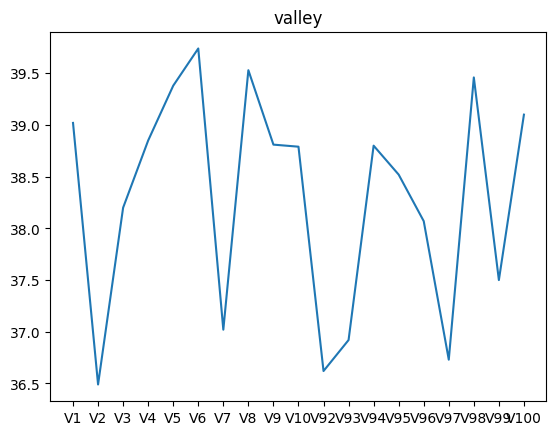

In [25]:
import matplotlib.pyplot as plt
plt.plot(x.iloc[0,:])
plt.title('valley');

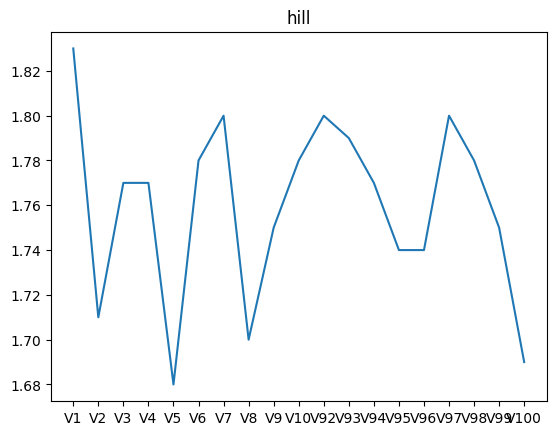

In [26]:
plt.plot(x.iloc[1,:])
plt.title('hill');

#Data Preprocessing

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
ss= StandardScaler()

In [29]:
x = ss.fit_transform(x)

In [30]:
x

array([[-0.45248681, -0.45361784, -0.45100881, ..., -0.45609618,
        -0.45164274, -0.45545496],
       [-0.45455665, -0.45556372, -0.45302369, ..., -0.45821768,
        -0.45362255, -0.45755405],
       [ 3.33983504,  3.24466709,  3.58338069, ...,  3.5427869 ,
         3.27907378,  3.74616847],
       ...,
       [ 0.11084204,  0.0505953 ,  0.04437307, ...,  0.12533312,
         0.04456025,  0.06450317],
       [-0.45272112, -0.45369729, -0.45118691, ..., -0.45648861,
        -0.45190136, -0.45569511],
       [ 0.01782872, -0.02636986,  0.05196137, ...,  0.03036056,
         0.01087365,  0.03123129]])

#Train_Test_Split

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify= y ,random_state=2529)

In [32]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((969, 19), (243, 19), (969,), (243,))

#Modeling

In [33]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [34]:
model.fit(x_train,y_train)

LogisticRegression()

#prediction

In [35]:
y_pred=model.predict(x_test)
y_pred.shape

(243,)

In [36]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0])

In [37]:
model.predict_proba(x_test)

array([[0.50604617, 0.49395383],
       [0.50606625, 0.49393375],
       [0.50566688, 0.49433312],
       [0.77715063, 0.22284937],
       [0.50598801, 0.49401199],
       [0.50606244, 0.49393756],
       [0.50609522, 0.49390478],
       [0.50614197, 0.49385803],
       [0.50643019, 0.49356981],
       [0.50588514, 0.49411486],
       [0.58029854, 0.41970146],
       [0.48114434, 0.51885566],
       [0.50604071, 0.49395929],
       [0.50607858, 0.49392142],
       [0.50608957, 0.49391043],
       [0.48639122, 0.51360878],
       [0.41066447, 0.58933553],
       [0.50339396, 0.49660604],
       [0.51278966, 0.48721034],
       [0.48998661, 0.51001339],
       [0.4608049 , 0.5391951 ],
       [0.50609811, 0.49390189],
       [0.50610077, 0.49389923],
       [0.50607561, 0.49392439],
       [0.50114035, 0.49885965],
       [0.50723558, 0.49276442],
       [0.27394383, 0.72605617],
       [0.50607798, 0.49392202],
       [0.5060878 , 0.4939122 ],
       [0.50184888, 0.49815112],
       [0.

#Model Evalution

In [38]:
from sklearn.metrics import confusion_matrix,classification_report

In [39]:
print(confusion_matrix(y_test, y_pred))

[[105  17]
 [ 97  24]]


In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.86      0.65       122
           1       0.59      0.20      0.30       121

    accuracy                           0.53       243
   macro avg       0.55      0.53      0.47       243
weighted avg       0.55      0.53      0.47       243



#Explanation



Here’s how you might approach Hill and Valley Prediction using Logistic Regression:

# 1.Understanding the Problem
Hill:
 Represents an area where the elevation increases and then decreases.
Valley: Represents an area where the elevation decreases and then increases.
#2. Data Preparation
Dataset:
 You would need a dataset that includes features representing the elevation points and a binary target variable indicating whether each point is a "hill" or a "valley.

 Feature Engineering: You may need to create features that capture the relevant characteristics of the elevation data, such as slope, curvature, etc.
#3. Logistic Regression Model
Logistic Regression models the probability that a given input belongs to a certain class (e.g., hill or valley).
The model can be trained using features like elevation, slope, etc., and the binary label (hill/valley).
#4. Training the Model
Train-Test Split: Split the dataset into a training set and a test set.
Training: Fit the Logistic Regression model to the training data.
Regularization: Apply regularization (L1, L2) to avoid overfitting.
#5. Evaluating the Model
Accuracy: Measure the accuracy on the test set.
Confusion Matrix: Look at the confusion matrix to understand the true positive, true negative, false positive, and false negative rates.
ROC Curve: Plot the ROC curve to assess the model’s ability to distinguish between hills and valleys.
#6. Improving the Model
Feature Selection: Choose the most relevant features for the classification.
Hyperparameter Tuning: Adjust parameters like the regularization strength.
Cross-Validation: Use cross-validation to ensure the model’s performance is consistent across different subsets of data.